# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.955500e+01     8.095680e+00
 * time: 0.0017309188842773438
     1     2.806278e+01     4.636998e+00
 * time: 0.007845878601074219
     2     1.857077e+01     3.616789e+00
 * time: 0.014091968536376953
     3     1.262058e+01     2.474715e+00
 * time: 0.018580913543701172
     4     1.102004e+01     1.847083e+00
 * time: 0.02237391471862793
     5     1.000149e+01     1.318217e+00
 * time: 0.026819944381713867
     6     9.405499e+00     9.353023e-01
 * time: 0.03101491928100586
     7     8.879364e+00     9.177790e-01
 * time: 0.03503608703613281
     8     8.415207e+00     7.116341e-01
 * time: 0.03898787498474121
     9     8.156568e+00     4.809283e-01
 * time: 0.043087005615234375
    10     8.026134e+00     4.028435e-01
 * time: 0.04738497734069824
    11     7.968975e+00     6.343445e-01
 * time: 0.05115795135498047
    12     7.945489e+00     8.539292e-01
 * time: 0.0549159049987793
    13     7.933121e+00     5.738722e-01
 *

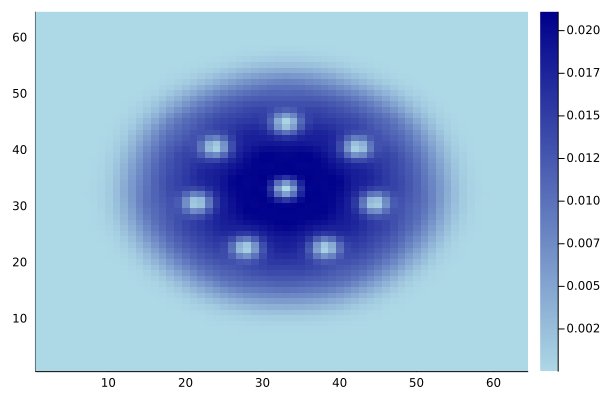

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)